In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from dateutil.relativedelta import relativedelta

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [3]:
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 14

In [4]:
df = pd.read_excel('Titer.xlsx', 'Time Series')
df = df[df['Batch'].str.contains('SB0010')==False]
df['Date_time'] = pd.to_datetime(df['Date_time'],infer_datetime_format = True)
indexedDataset = df.set_index(['Date_time'])
###test = df[df['Batch'].isin(['SB0011','SB0012','SB0013','SB0014','SB0015','SB0016','SB0017','SB0018','SB0019'])]
###test['Date_time'] = pd.to_datetime(test['Date_time'],infer_datetime_format = True)
indexedDataset_test = test.set_index(['Date_time'])

In [5]:
df.isna().sum()

Date_time    0
Titer        0
Batch        0
dtype: int64

In [6]:
indexedDataset.head()

,Titer,Batch
Date_time,,
2018-09-20 22:35:00,0.269076,SB0011
2018-09-20 23:05:00,0.272492,SB0011
2018-09-20 23:35:00,0.277593,SB0011
2018-09-21 00:05:00,0.281034,SB0011
2018-09-21 00:35:00,0.274207,SB0011


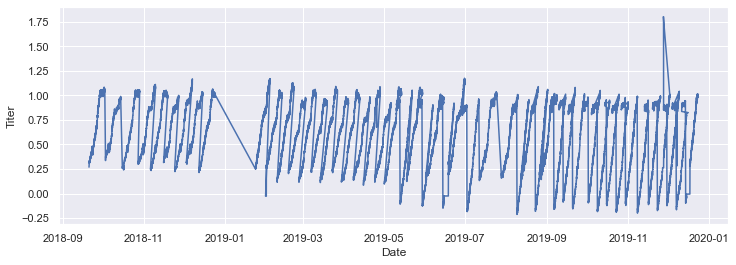

In [7]:
plt.xlabel('Date')
plt.ylabel('Titer')
plt.plot(indexedDataset.drop(['Batch'], axis =1))
plt.show()

In [8]:
df = df[~df['Batch'].isin(['SB0010','SB0011','SB0012','SB0013','SB0014','SB0015','SB0016','SB0017','SB0018','SB0019'])]
df.head(5)

,Date_time,Titer,Batch
5965,2019-01-24 09:02:00,0.248404,SB0021
5966,2019-01-24 09:32:00,0.275247,SB0021
5967,2019-01-24 10:02:00,0.253910,SB0021
5968,2019-01-24 10:32:00,0.258902,SB0021
5969,2019-01-24 11:02:00,0.264320,SB0021


In [9]:
df['Date_time'] = pd.to_datetime(df['Date_time'],infer_datetime_format = True)
indexedDataset = df.set_index(['Date_time'])
from datetime import datetime
indexedDataset.head(3)

,Titer,Batch
Date_time,,
2019-01-24 09:02:00,0.248404,SB0021
2019-01-24 09:32:00,0.275247,SB0021
2019-01-24 10:02:00,0.253910,SB0021


<AxesSubplot:xlabel='Titer', ylabel='Density'>

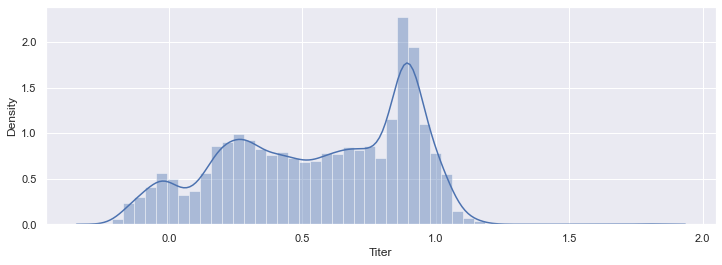

In [10]:
sns.distplot(indexedDataset['Titer'])

<AxesSubplot:>

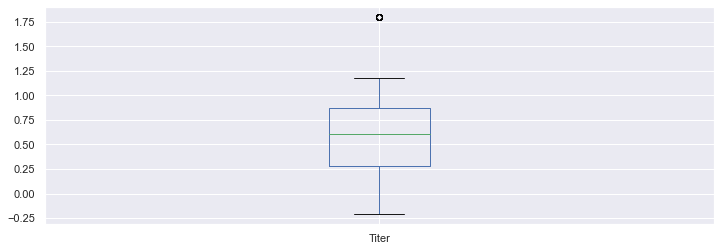

In [11]:
indexedDataset['Titer'].plot.box()

In [12]:
Q1 = np.percentile(indexedDataset['Titer'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(indexedDataset['Titer'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)

0.5906964391469955


In [13]:
indexedDataset['Titer'] = np.where(indexedDataset['Titer']> 1.25, IQR,indexedDataset['Titer'])

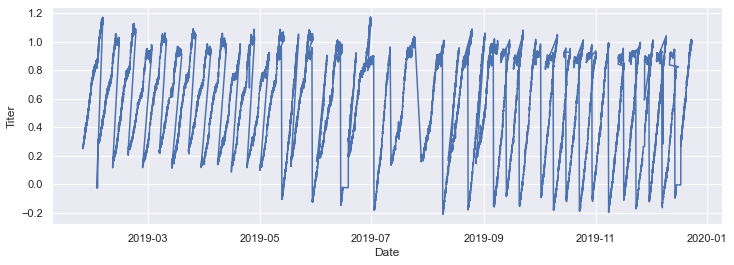

In [14]:
plt.xlabel('Date')
plt.ylabel('Titer')
plt.plot(indexedDataset.drop(['Batch'], axis =1))
plt.show()

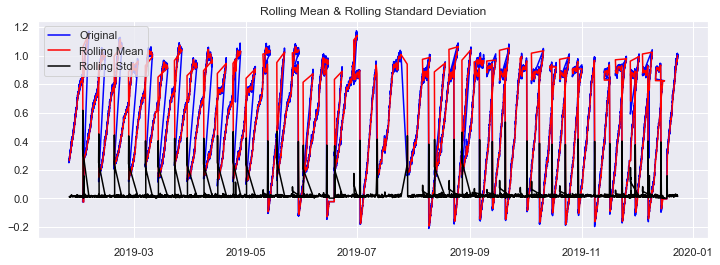

In [15]:
### Checking stationarity of data through Rolling Statistics ### 

rolling_mean = indexedDataset.drop(['Batch'], axis =1).rolling(window = 12).mean()
rolling_std = indexedDataset.drop(['Batch'], axis =1).rolling(window = 12).std()
plt.plot(indexedDataset.drop(['Batch'], axis =1), color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(indexedDataset['Titer'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -9.477285236462125
p-value: 3.9582901919429094e-16
Critical Values:
	1%: -3.4306279318133654
	5%: -2.861662837108715
	10%: -2.5668353826600843


In [ ]:
## P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary

In [17]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [18]:
### Train and Test Sets ###
size = int(len(indexedDataset)*0.80)
train = indexedDataset[0:size]
test = indexedDataset[size:len(indexedDataset['Titer'])]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(18831, 2) (4708, 2)
Titer    0.572976
Batch      SB0045
Name: 2019-10-21 10:16:00, dtype: object Titer    0.992826
Batch      SB0053
Name: 2019-12-23 08:20:00, dtype: object


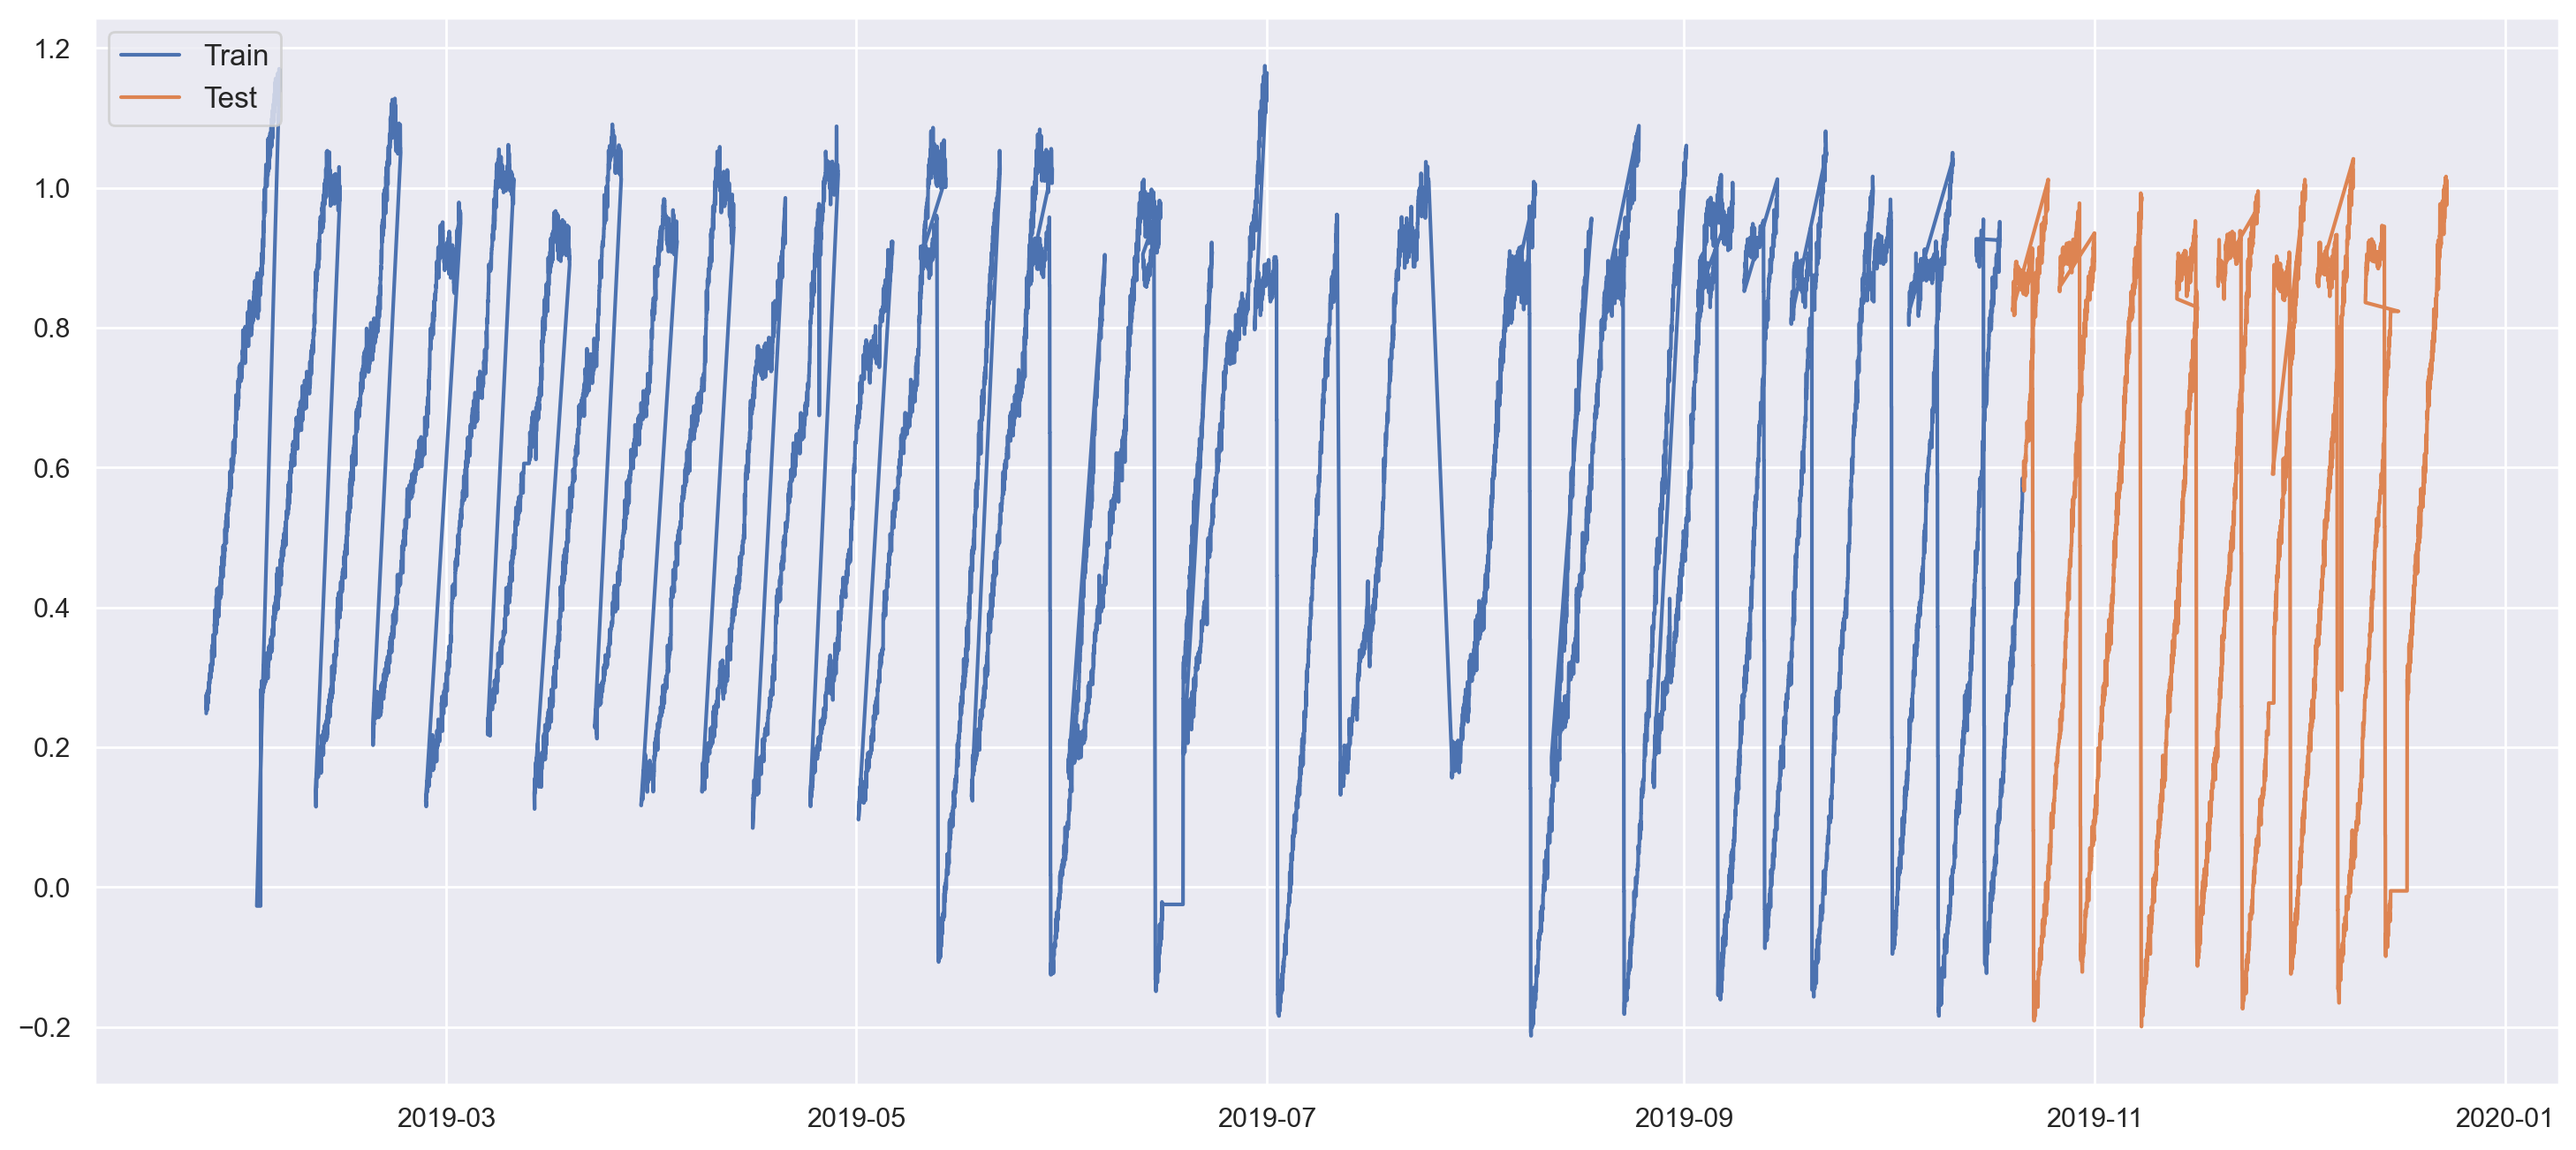

In [19]:
plt.rcParams.update({'figure.figsize':(18,8),'figure.dpi':200})
#kws = dict(marker='o')
plt.plot(train.drop(['Batch'], axis =1), label='Train')
plt.plot(test.drop(['Batch'], axis =1), label='Test')
plt.legend(loc ='upper left',fontsize = 12)
plt.show()

In [ ]:
#pip install pmdarima

In [ ]:
from pmdarima import auto_arima
#stepwise_fit = auto_arima(train['Titer'],trace = True,supress_warning =True)
#stepwise_fit.summary()

In [42]:
### Non Seasonal Arima model ###
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(train['Titer'],order =(1,1,1))
model_111_fit = model_111.fit(disp =0)
print(model_111_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Titer   No. Observations:                18830
Model:                 ARIMA(1, 1, 1)   Log Likelihood               36974.438
Method:                       css-mle   S.D. of innovations              0.034
Date:                Wed, 31 Aug 2022   AIC                         -73940.876
Time:                        19:44:06   BIC                         -73909.503
Sample:                             1   HQIC                        -73930.582
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.738e-05      0.000      0.060      0.952      -0.001       0.001
ar.L1.D.Titer     0.8920      0.027     33.219      0.000       0.839       0.945
ma.L1.D.Titer    -0.8743      0.029    -

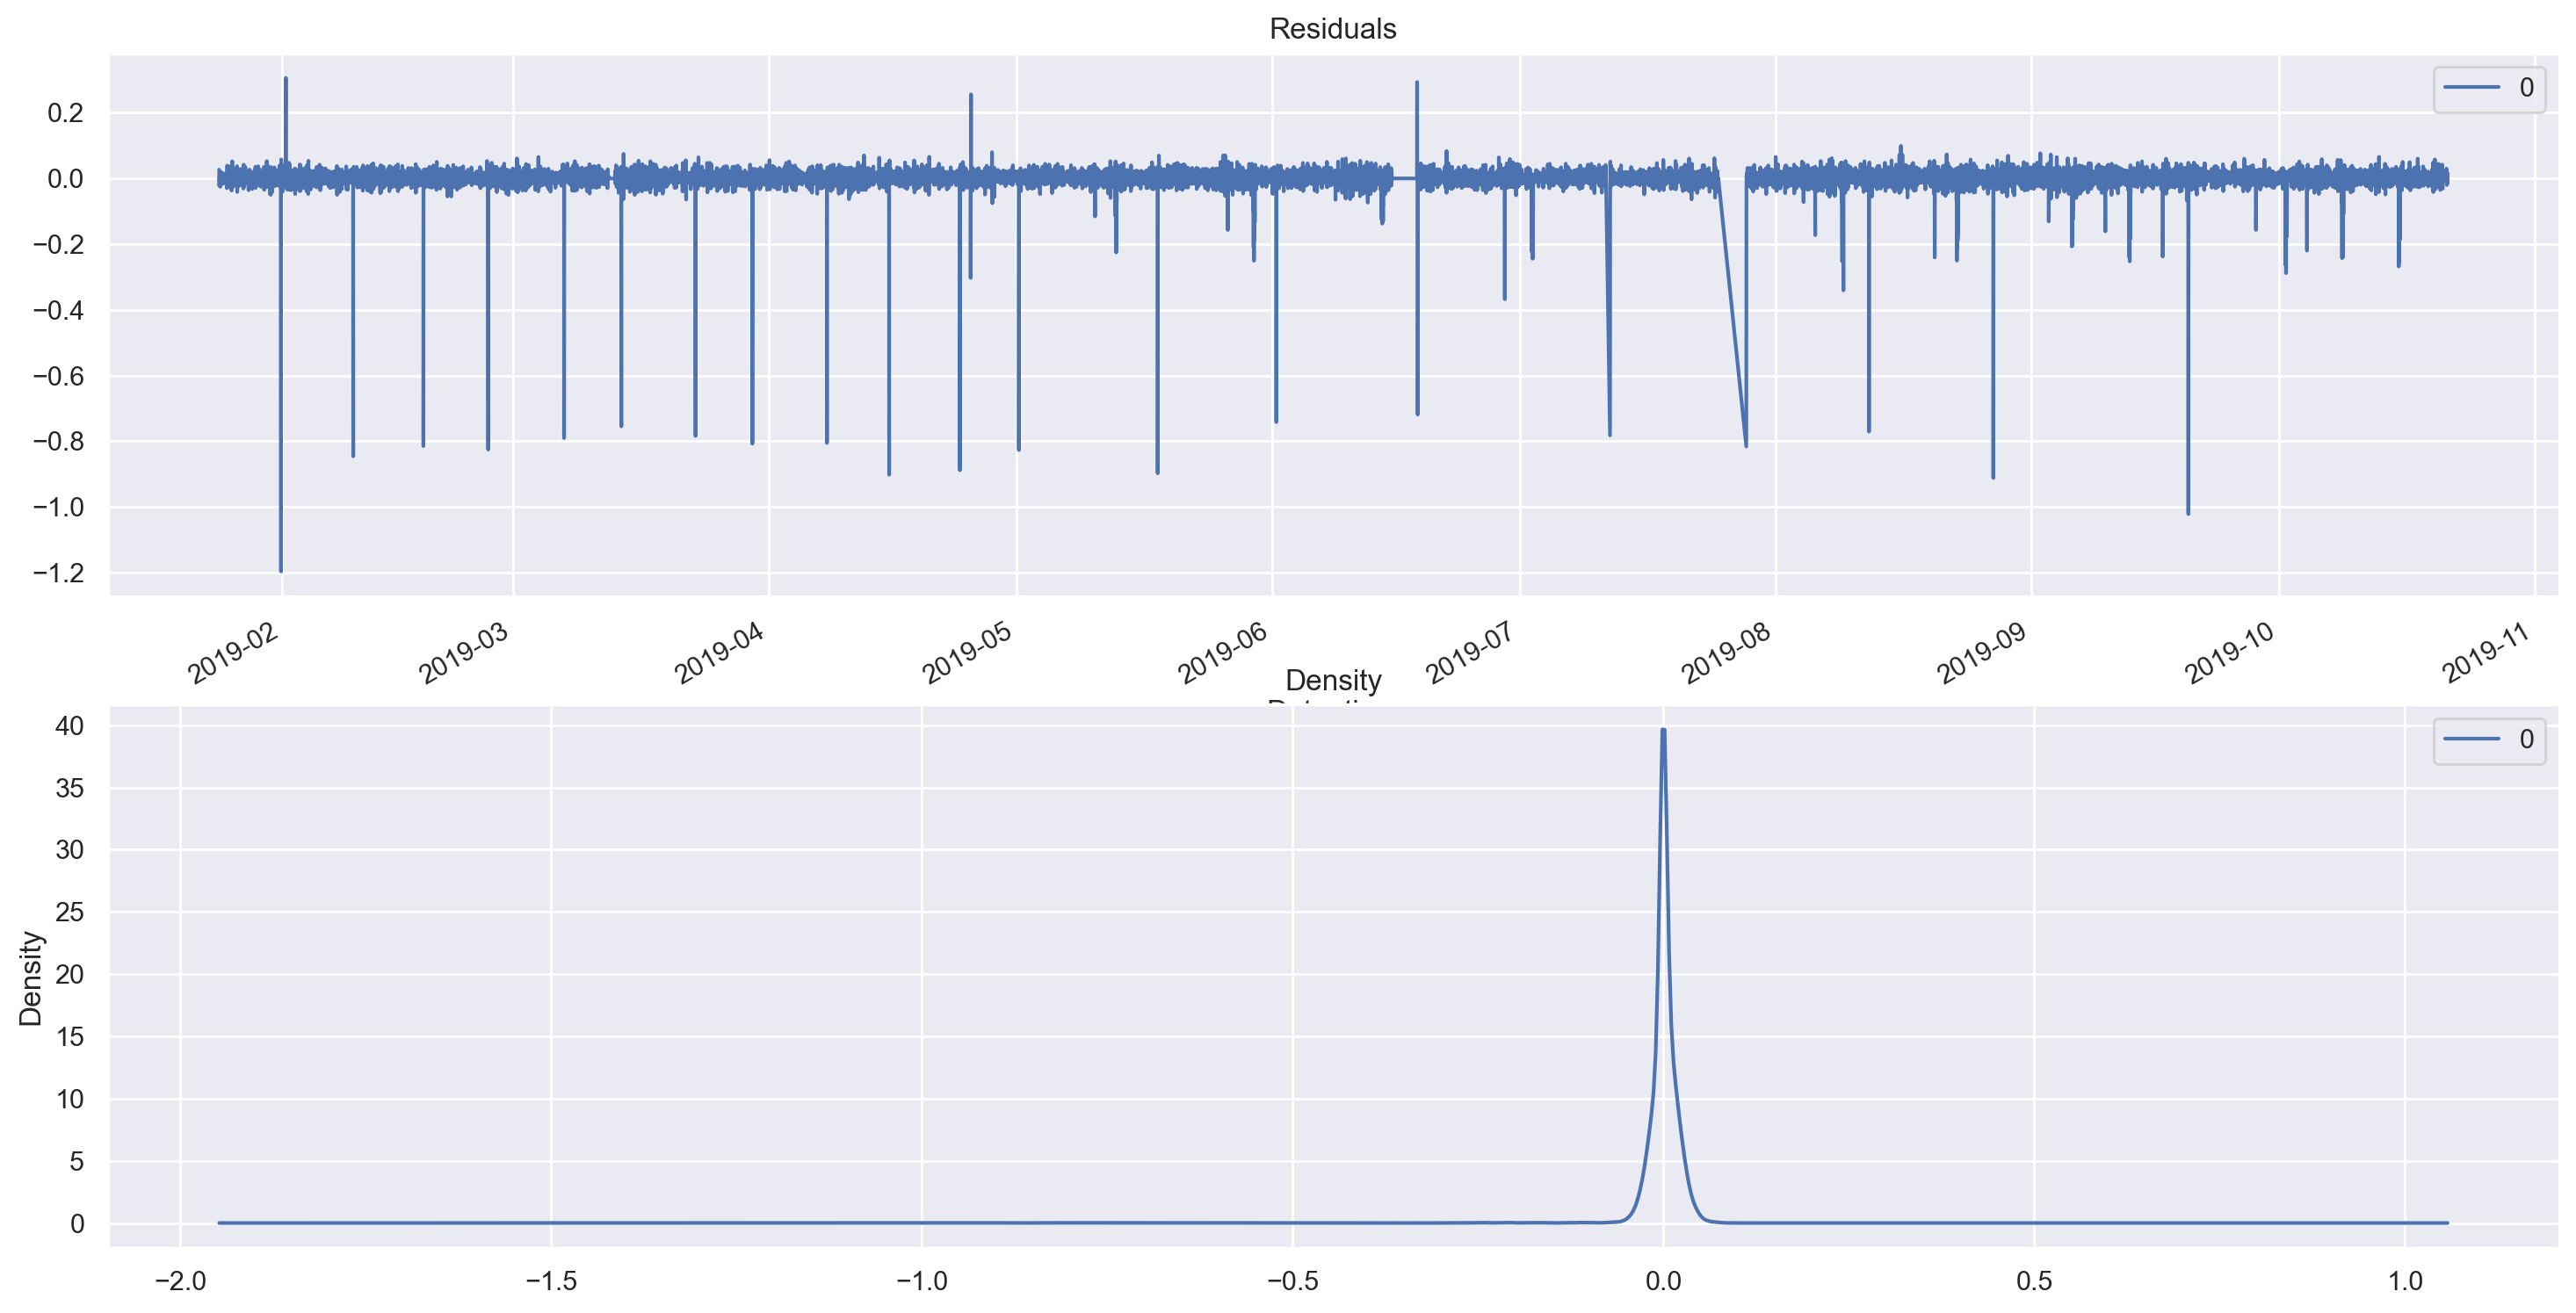

In [43]:
## plot residual Errors ##
residuals_111 = pd.DataFrame(model_111_fit.resid)
fig,ax = plt.subplots(2,1)
residuals_111.plot(title ="Residuals",ax=ax[0],figsize = (18,10))
residuals_111.plot(kind='kde',title ='Density', ax=ax[1])
plt.show()

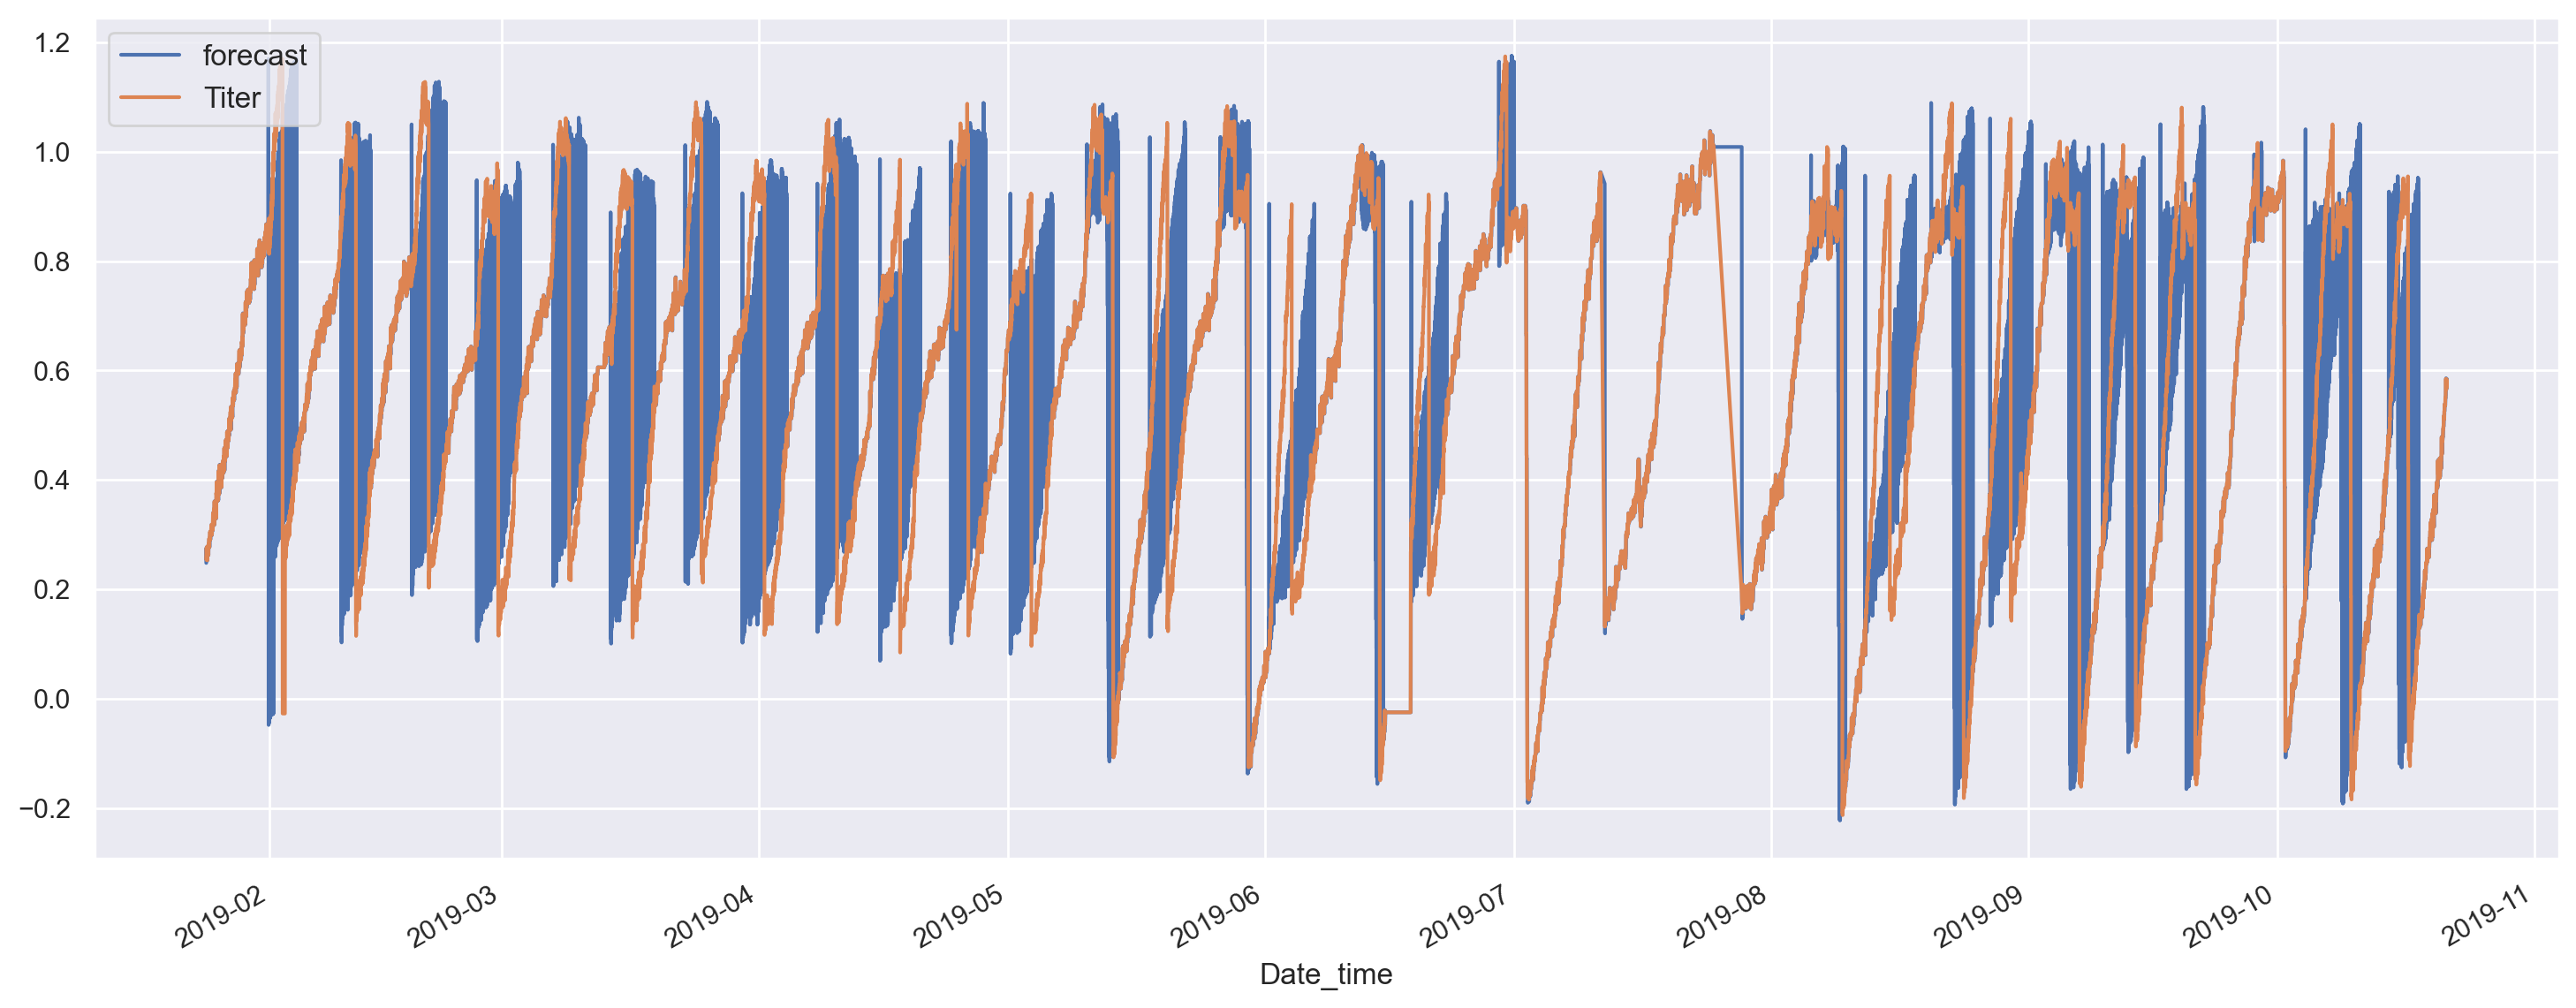

In [44]:
## Actual vs Fitted ##
plt.rcParams.update({'figure.figsize':(18,7),'figure.dpi':200})
model_111_fit.plot_predict(dynamic =False)
plt.legend(loc ='upper left',fontsize = 12)
plt.show()

In [45]:
test.shape

(4708, 2)

In [46]:
test['forecast']= model_111_fit.predict(start= test.index[0],end= test.index[-1],dynamic=True)
test[['Titer','forecast']].plot(figsize=(12,8))

KeyError: 'only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices'

In [ ]:
y_pred = model_111_fit.forecast(len(test.index))
y_pred_df["Predictions"] =  model_111_fit.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()

In [ ]:
fc,se,conf = fitted.forecast(108,alpha =0.05) #conf

In [ ]:
fc_series = pd.Series(fc,index=test.index)
lower.series = pd.Series(conf[1,0],index=test.index)
upper.series = pd.Series(conf[1,0],index=test.index)

In [ ]:
# plot ##
plt.figure(figsize(17,5),dpi =100)
plt.plot(indexedDataset['Titer'],label='Training')
plt.plot(test['Titer'],label = 'Actual')
plt.plot(fc_series,label='Forecast')
plt.fill_between(lower.series.index,lower.series,upper.series,color='k',alpha =.15)
plt.title("Forecast vs Actuals")
plt.legend(loc='upper left',fontsize =12)
plt.show()